<a href="https://www.kaggle.com/code/mersaidylmaz/hepatitis-c-predict?scriptVersionId=147062478" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

style.use("fivethirtyeight")

## Verinin Yüklenmesi

In [2]:
data = pd.read_csv("/kaggle/input/hepatitis-c-dataset/HepatitisCdata.csv")
df = data.copy()
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Değişkenlerin İncelenmesi

ALP : Alkalen Fosfataz (ALP), vücut içerisinde bulunan önemli enzimler arasında yer alır. ALP testi, karaciğer hasarını veya kemik bozukluklarını teşhis etmek için kandaki karaciğer ve kemiklerden yer alan ALP seviyelerini ölçmede kullanılır. İki tür ALP testi vardır. Bunlardan biri yaygın olan genel ALP testi iken, diğeri ALP izoenzim testidir

Bilirubin: Kan elemanlarından olan alyuvarların yıkımı sonucu ortaya çıkan bir maddedir. Kandaki bilirubin karaciğer tarafından işlenir ve safraya karıştırılır. Safra içeriğiyle birlikte bağırsağa geçen bilirubin gaita yoluyla vücuttan dışarı atılır. Karaciğer fonksiyonlarında meydana gelen bozulmaya veya aşırı alyuvar yıkımına bağlı olarak bilirubin değerlerinde artış meydana gelebilir.

ALT : Alanin aminotransferaz (ALT); bir enzim türü olup esas olarak karaciğerde, az miktarlarda ise böbrek ve diğer organlarda bulunur. Aynı zamanda serum glutamik piruvik transaminaz (SGPT) olarak da adlandırılır. Besinlerle birlikte vücuda alınarak sindirime uğradıktan sonra karaciğere ulaşan besin ögelerinin enerjiye çevrilmesinde görev yapar. Normal şartlarda bu enzim karaciğer hücrelerinin içerisinde yer alır, kan dolaşımında ise ölen karaciğer hücrelerinden kaynaklı olarak eser miktarda bulunur. Kandaki ALT seviyesinin normalin üzerinde olması, karaciğer harabiyetinin güçlü bir göstergesidir.

AST : Vücudun en büyük iç organı karaciğer tarafından üretilen bir enzim olan Aspartat Aminotransferaz, rutin olarak her zaman kan dolaşımında bir miktar bulunur. Serum glutamik oksaloasetik transaminaz (SGOT) olarak da bilinen Aspartat Aminotransferaz testi (AST), karaciğer hasarının saptanması ve pek çok karaciğer hastalığının tanısı için kullanılan biyokimyasal bir laboratuvar testidir.Referans aralığı ya da farklı bir deyişle AST testi normal değerleri, kadınlarda 15 ile 42 IU/L iken erkeklerde 15 ile 20 IU/L düzeyindedir. Yapılan laboratuvar testinde kan düzeyindeki Aspartat Aminotransferaz seviyesinin yüksek olması, karaciğer hasarlanması ve hastalıkları başta olmak üzere, her zaman AST enzimi bulunan kalp, beyin, böbrek ve kaslarda olası hasarlanmanın işareti olabilir. 

ALB : Kan plazmasının yanı sıra dokuların içeriğinde bulunan sıvılarda da bulunan albümin; ter, gözyaşı, safra, mide sıvısı, kas ve deri gibi pek çok bölgede bulunan bir protein türüdür. Albümin, suda zor çözünen yağ asitlerinin kan yoluyla, doku ve organlara taşınmasını sağlamasının yanı sıra oluşturduğu onkotik basınç sayesinde boyutsal olarak büyük olan proteinlerin dar alanlara geçişini sağlar.Kişinin vücudunda bulunan albüminin az ya da çok olması, bazı hastalıklara bağlı olarak meydana gelebileceği gibi dehidrasyon (susuz kalma), aşırı terleme, yetersiz ve dengesiz beslenmeye bağlı olarak da oluşabilir. Albümin referans değerleri (normal değerleri) 3,1 ila 5,5 g/dL'dir. 

GGT : GGT, gama glutamil transpeptidaz olarak da adlandırılabilen bir tür enzim olup esas olarak karaciğerde yer alır. Ancak daha az miktarda da olsa vücudun farklı organlarında da yer alır. İnsan vücudunda çok sayıda enzim türü mevcuttur ve bunlar vücudun doğal süreçlerinin işleyişinde katalizör olarak görev yaparak günlük işlevlerin yerine getirilmesine yardımcı olur. Bu enzimlerden bir tanesini oluşturan GGT doğal koşullarda hücrelerin içerisinde yer alır. Herhangi bir nedenle hücre hasarları meydana geldiğinde enzim hücre dışına çıkar ve bunun sonucunda kandaki enzim seviyesinde artış gözlenebilir.

CREA : Kreatin , vücuttaki tüm kas sistemlerinin günlük faaliyetlerinin sonucunda atık bir maddir. Ortaya çıkan ve kreatinin olarak adlandırılan bu son atık maddenin kandaki oranı kas aktivitesi ve kas kitlesinden etkilenir. Kaslı kişilerde kreatinin üretimi yüksekken, zayıf ve yaşlı kişilerde düşüktür. Yetişkinler için serum kreatinin normal değeri, erkeklerde 0.50 mg/dL ile 1.40 mg/dL iken, kadınlarda 0.50 mg/dL ile 1.30 mg/dL'dir. Kreatinin klirensi olarak tanımlanan ve 24 saatlik idrarın toplanması ile yapılan testin referans aralığı aşağıdaki gibidir:

13-50 yaş: Erkeklerde 90-137 mL/dk. Kadınlarda 80-125 mL/dk.
51-60 yaş: Erkeklerde 85-132 mL/dk. Kadınlarda 75-120 mL/dk.
60 yaş ve üzeri: Erkeklerde 80-132 mL/dk. Kadınlarda 70-120 mL/dk.

CHOL : Kolesterol, hayvan hücrelerinin zarlarında bulunan ve aynı zamanda kan plazmasında taşınan, vücutta özellikle endokrin sistem ve sindirim sisteminde birtakım görevlere sahip olan yağ benzeri bir maddedir. Hayvansal kaynaklı besinlerde bulunan ve bu besinlerin tüketilmesi ile vücuda alınan kolesterol, aynı zamanda vücutta da karaciğer başta olmak üzere ince bağırsak, böbrek üstü bezleri, üreme organları gibi pek çok dokuda sentezlenebilme özelliğine sahiptir.Tüm vücut hücrelerinde bulunan ve hücre zarının temel bileşenleri arasında yer alan kolesterolün vücutta pek çok işlevi vardır. Buna karşılık kandaki kolesterol seviyesinin normalin üzerine çıkması, kalp ve damar hastalıkları ve safra kesesi hastalıkları gibi pek çok hastalığa zemin hazırlar. Kanda biriken kötü kolesterol, damar duvarlarına yerleşerek damar tıkanıklarının oluşmasına neden olur. 


# Veri Ön İşleme Ve İlk Bakış

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
## Gereksiz olan Unnamed: 0 sütununun veriden çıkarılması
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Değişken Düzenleme

In [6]:
df['Category'] = df['Category'].replace({
    '0=Blood Donor': 0, 
    '0s=suspect Blood Donor': 0, 
    '1=Hepatitis': 1, 
    '2=Fibrosis': 2, 
    '3=Cirrhosis': 3})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

## Eksik Gözlem Analizi

In [7]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
## Eksik Gözlemlerin ortalama ile doldurulması
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

In [9]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [10]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [11]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']

In [12]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


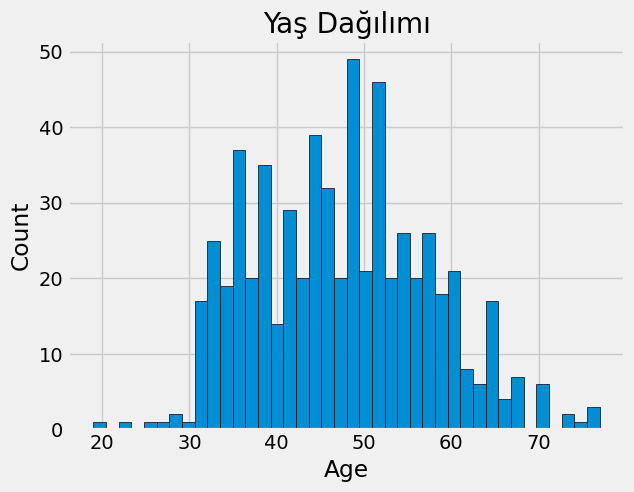

In [13]:
plt.hist(df['Age'], bins=40, edgecolor='black')
plt.title('Yaş Dağılımı')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_24/1553843910.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=40)


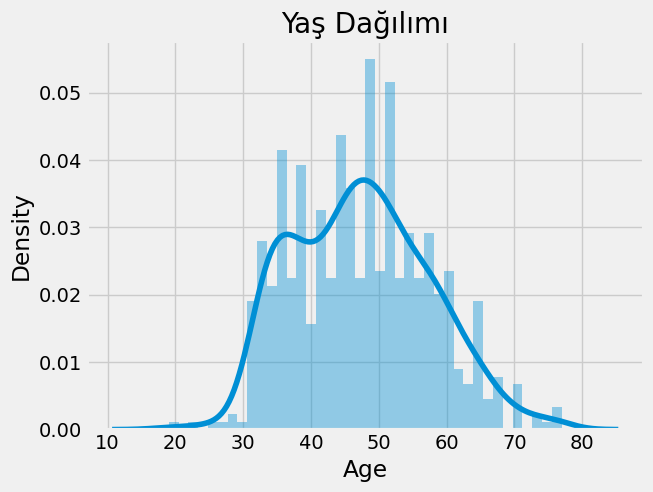

In [14]:
# Bar plot ile Yaş Değişkeni İncelenmesi
sns.distplot(df['Age'], bins=40)
plt.title('Yaş Dağılımı')
plt.show()
import warnings
warnings.filterwarnings("ignore")

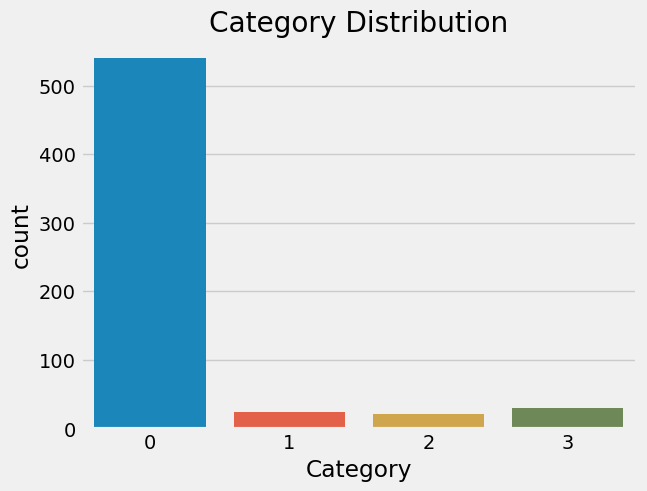

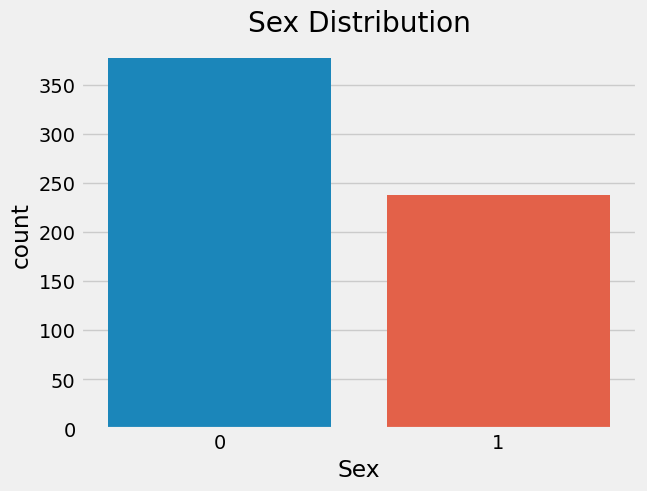

In [15]:
# Çoklu Gözlem Analizi
for col in ["Category", 'Sex']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

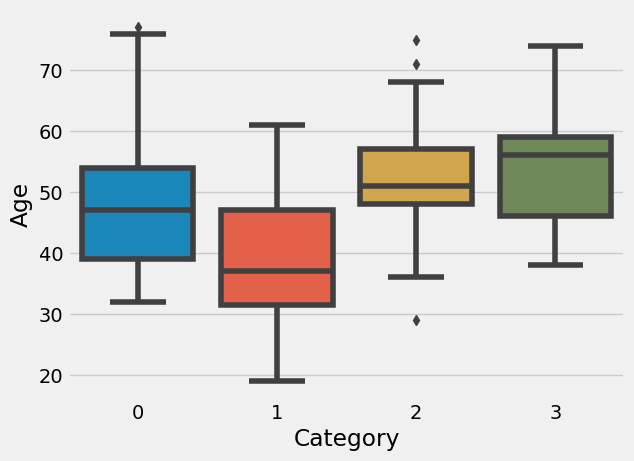

In [16]:
sns.boxplot(x="Category", y="Age", data=df)
plt.show()

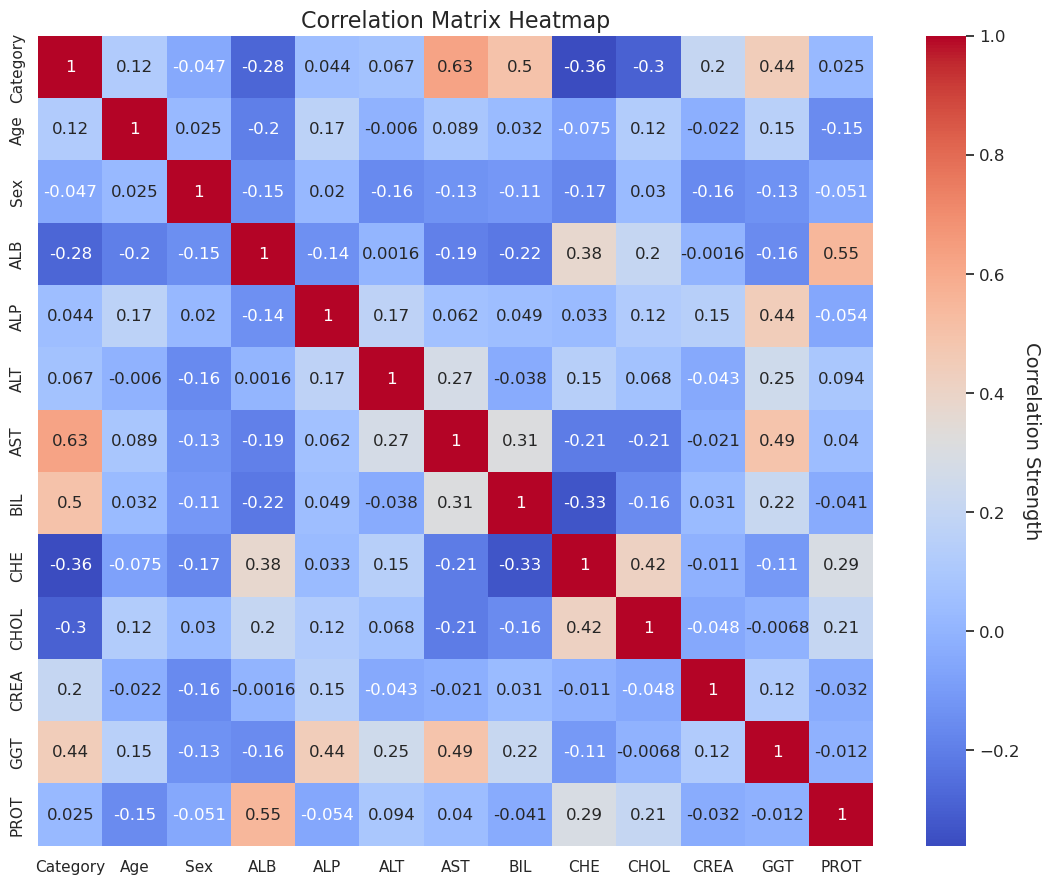

In [17]:
# Değerlerin birbiriyle alakasını açıklayan Korelasyonm Matrisinin Heatmap ile incelenmesi
sns.set(style="whitegrid")
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Matrix Heatmap", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
plt.show()

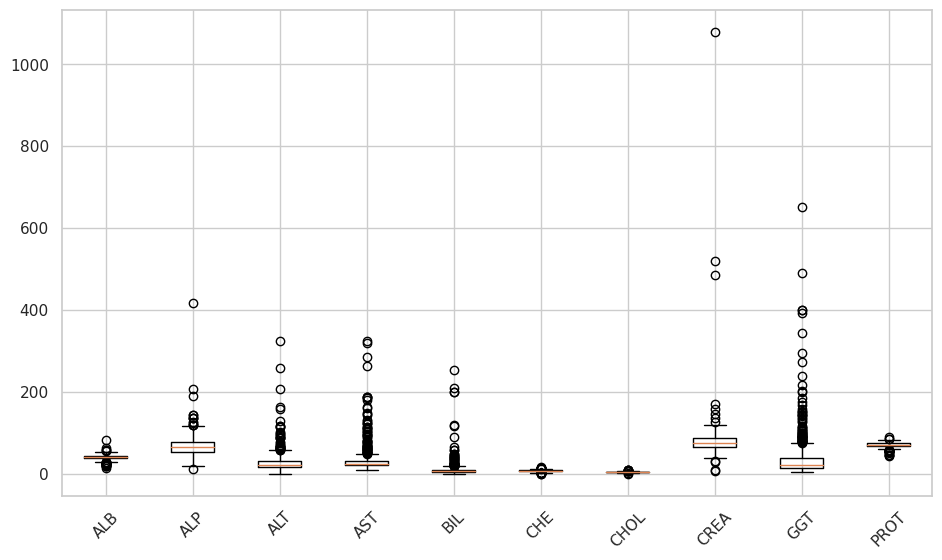

In [18]:
#Bağımsız değişkenlerin kutu grafiği yardımıyla değerlerini gösterimi
import matplotlib.pyplot as plt

# Değişken listesi oluşturma
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

plt.figure(figsize=(10,6))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

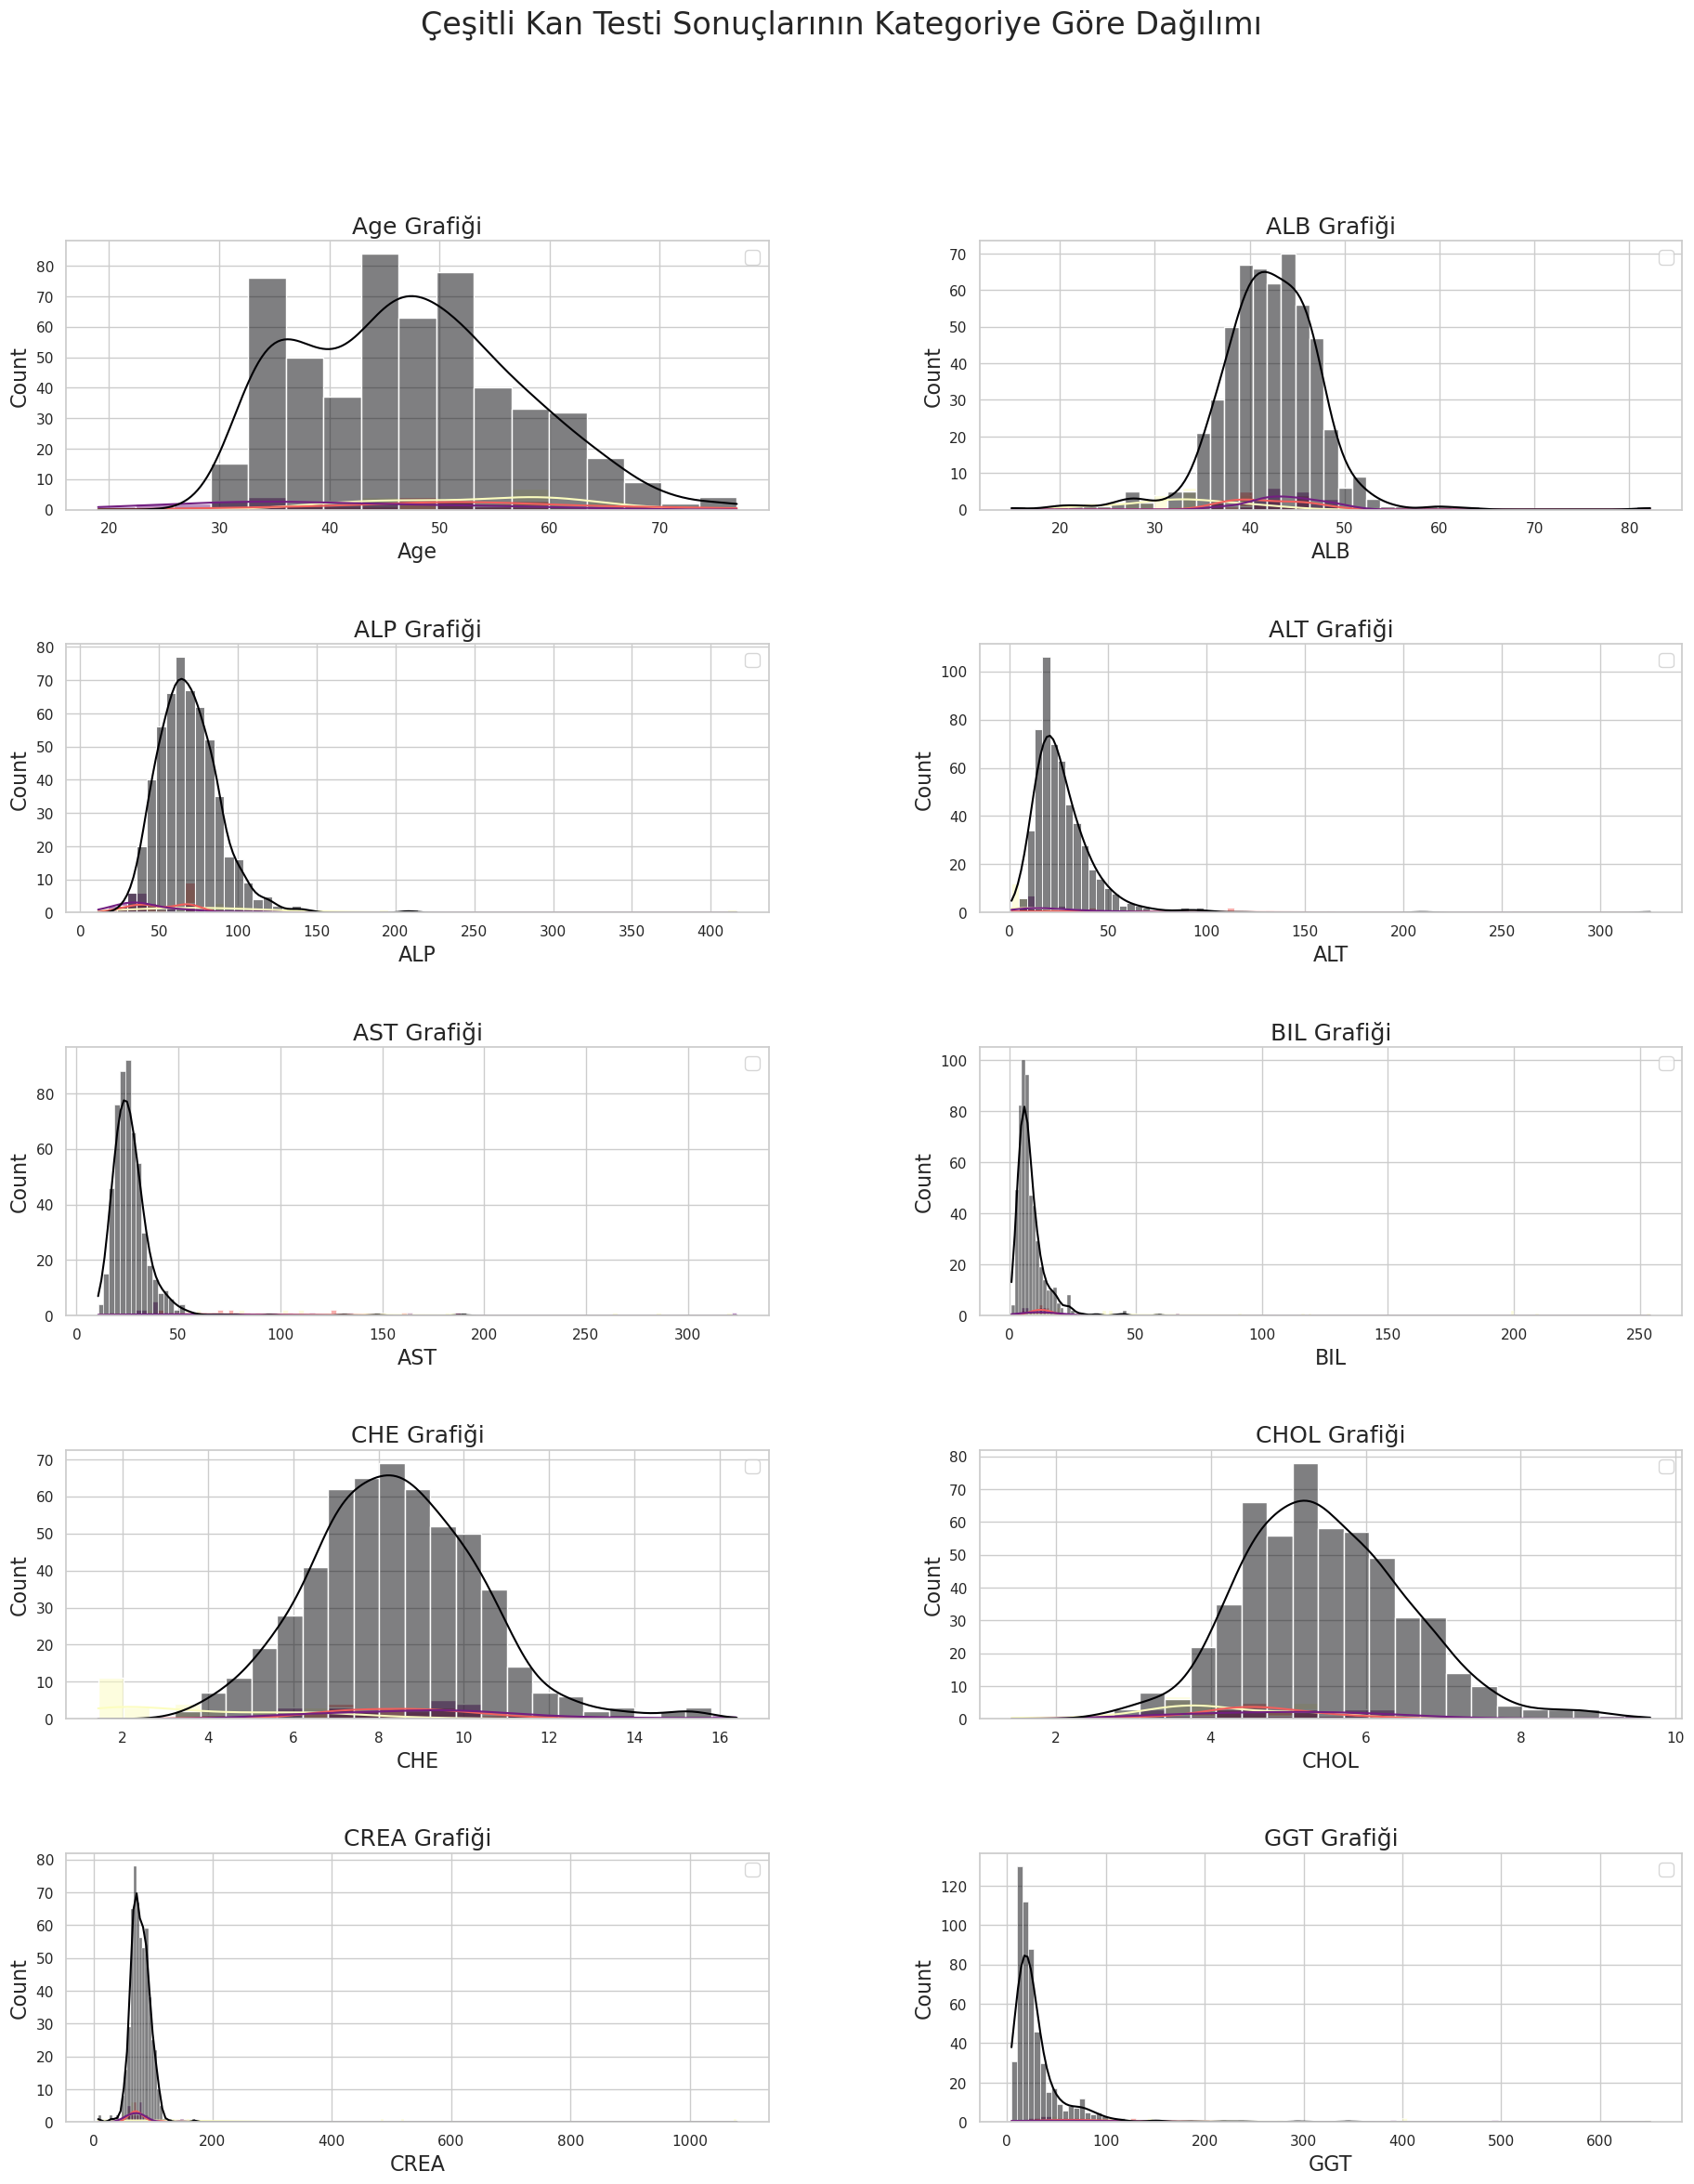

In [19]:
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Grafiği çiziecek değişkenler
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

# Değişkenlerin grafiğini çizdirecek fonksiyon
for i, col in enumerate(columns):
    sns.histplot(x=df[col], hue=df["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  
    axes[i].set_ylabel("Count", fontsize=16) 
    axes[i].set_title(f"{col} Grafiği", fontsize=18)   
    axes[i].legend(fontsize=14)  

# Grafiğin Başlığı
fig.suptitle("Çeşitli Kan Testi Sonuçlarının Kategoriye Göre Dağılımı ", fontsize=24)

# Grafikler arası boşluğu ayarlama
plt.subplots_adjust(hspace=0.5, wspace=0.3)    

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
##CART model ile tahmin işlemi
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier().fit(X_train , y_train)
y_pred_cart = cart_model.predict(X_test)
print("CART Accuracy :" + str(np.sqrt(accuracy_score(y_test , y_pred_cart))))

CART Accuracy :0.944400281603035


In [22]:
##Random Forest  modeli tahmini yapmak için model import etme işlemi yapıyoruz
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train , y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_rf))))

Random Forest Accuracy:0.9472577776388523


In [23]:
##Bagging ile tahmin işlemi
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(bootstrap_features = True).fit(X_train , y_train)
y_pred_bag = bag_model.predict(X_test)
print("Bagging Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_bag))))

Bagging Accuracy:0.9472577776388523


In [24]:
##GBM ile tahmin işlemi
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train , y_train)
y_pred_gbm = gbm_model.predict(X_test)
print("GBM Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_gbm))))

GBM Accuracy:0.9586025865388216


In [25]:
##Yapay Sinir ağı modeli ile tahmin işlemi
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier().fit(X_train , y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("MLPRegressor Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_mlp))))

MLPRegressor Accuracy:0.9529470646935789


In [26]:
## KNeighborsRegressor modeli ile tahmin işlemi
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train , y_train)
y_pred = knn_model.predict(X_test)
print("KNeighborsRegressor Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred))))

KNeighborsRegressor Accuracy:0.9299811099505543


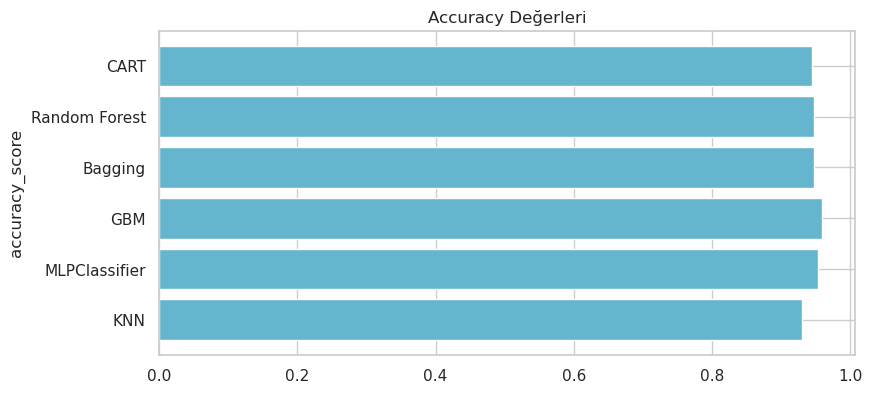

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Hesaplanmış değerleri tanımlayın
accuracy_score = [
    np.sqrt(accuracy_score(y_test, y_pred)),
    np.sqrt(accuracy_score(y_test, y_pred_mlp)),
    np.sqrt(accuracy_score(y_test, y_pred_gbm)),
    np.sqrt(accuracy_score(y_test, y_pred_bag)),
    np.sqrt(accuracy_score(y_test, y_pred_rf)),
    np.sqrt(accuracy_score(y_test, y_pred_cart))
]

# Model adları
methods = ["KNN", "MLPClassifier", "GBM", "Bagging", "Random Forest", "CART"]


# Accuracy Score için bar plot grafiği
plt.figure(figsize=(8, 4))
plt.barh(methods, accuracy_score, color="c")
plt.ylabel('accuracy_score')
plt.title('Accuracy Değerleri')
plt.show()


## SONUÇ
#### Eğitilmiş modeller ile yapılan testler sonucu bu Classification yani Sınıflandırma problemi için en yüksek tahmin değerini % 95.57 ile GBM Modelinin vermiş olduğu görülmüştür.